# 'Project: Problem Statement - Personal Loan Campaign Modelling'
## 'Thera Bank Personal Loan Campaign'
 
**Data Description:**
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain:**
Banking

**Context:**
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

**Attribute Information:**

ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?
 
**Learning Outcomes:**
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 
**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### 1) Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks) 

In [127]:
#Libraries
import numpy as np
# from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, recall_score, precision_score, \
f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

#Dataset
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Check datatype
bank.info()

#All are integers except CCAvg which is a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#info part 2
bank.info

<bound method DataFrame.info of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Onli

In [7]:
#Statistical summary - 5 part summary
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
#Shape
bank.shape

(5000, 14)

In [231]:
#Columns
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
#Null values - no values with null data
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
#Incorrect Imputation
bank.applymap(np.isreal)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
mask = bank.applymap(np.isreal).all(axis=1)
mask

0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Length: 5000, dtype: bool

In [15]:
bank[~mask]

#output is nothing, therefore, data set contains all REAL numbers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### 2) EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
a) Number of unique in each column? 
b) Number of people with zero mortgage? 
c) Number of people with zero credit card spending per month? 
d) Value counts of all categorical columns. 
e) Univariate and Bivariate 
f) Get data model ready 

In [20]:
# a) Number of unique in each column?
bank1=bank.nunique()
bank1

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [27]:
# b) Number of people with zero mortgage?
zeroM=bank[bank.Mortgage == 0]
zeroM.info()

#There are 3462 people who have zero mortgages

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3462 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3462 non-null   int64  
 1   Age                 3462 non-null   int64  
 2   Experience          3462 non-null   int64  
 3   Income              3462 non-null   int64  
 4   ZIP Code            3462 non-null   int64  
 5   Family              3462 non-null   int64  
 6   CCAvg               3462 non-null   float64
 7   Education           3462 non-null   int64  
 8   Mortgage            3462 non-null   int64  
 9   Personal Loan       3462 non-null   int64  
 10  Securities Account  3462 non-null   int64  
 11  CD Account          3462 non-null   int64  
 12  Online              3462 non-null   int64  
 13  CreditCard          3462 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 405.7 KB


In [39]:
# c) Number of people with zero credit card spending per month?
zeroCC=bank[bank.CCAvg == 0]
zeroCC.info()

#There are 106 people that have zero credit card spending per month

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 63 to 4949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  106 non-null    int64  
 1   Age                 106 non-null    int64  
 2   Experience          106 non-null    int64  
 3   Income              106 non-null    int64  
 4   ZIP Code            106 non-null    int64  
 5   Family              106 non-null    int64  
 6   CCAvg               106 non-null    float64
 7   Education           106 non-null    int64  
 8   Mortgage            106 non-null    int64  
 9   Personal Loan       106 non-null    int64  
 10  Securities Account  106 non-null    int64  
 11  CD Account          106 non-null    int64  
 12  Online              106 non-null    int64  
 13  CreditCard          106 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 12.4 KB


In [43]:
# d) Value counts of all categorical columns: Education, Family, Personal Loan, Securities Account, CD Account, Online, CC
# I only felt that Family and Education were categorical columns. But after asking the project discussion board,
# the reply was to include the yes/no question columns

#Education
edu=bank.groupby('Education').count()
edu

#Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# 2096 people have Undergraduates degrees (41.92%)
# 1403 people have Graduates degrees (28.06%)
# 1501 people have Advance/Professional degrees (30.02%)

# Most customers have undergraduate degrees

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Education,,,,,,,,,,,,,
1,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096
2,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
3,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501


In [213]:
# d) Value counts of all categorical columns: Education, Family, Personal Loan, Securities Account, CD Account, Online, CC

#Family
family=bank.groupby('Family').count()
family

#Family Size Distributions:
# 1 person: 1472 (29.44%)
# 2 people: 1296 (25.92%)
# 3 people: 1010 (20.20%)
# 4 people: 1222 (24.44%)

# Majority of customers are single

,ID,Age,Experience,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Family,,,,,,,,,,,,,
1,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472,1472
2,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
3,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010
4,1222,1222,1222,1222,1222,1222,1222,1222,1222,1222,1222,1222,1222


In [214]:
#Personal Loans
pLoan=bank.groupby('Personal Loan').count()
pLoan

# 4520 people did not take personal loans (90.40%)
# 480 people did buy the personal loans (9.60%)

#Less than 10% of people in the data set bought personal loans from the bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [215]:
#Securities Account

saccount=bank.groupby('Securities Account').count()
saccount

# 4478 people do not have a Securities Account with the bank (89.56%)
# 522 people have a Securities Account with the bank (10.44%)

#Only about 10% of the customer data set has a Securities Account with the bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,Online,CreditCard
Securities Account,,,,,,,,,,,,,
0,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478
1,522,522,522,522,522,522,522,522,522,522,522,522,522


In [216]:
#CD Account

cdaccount=bank.groupby('CD Account').count()
cdaccount

# 4698 people do not have a CD Account wtih the bank (93.96%)
# 302 people have a CD Account with the bank (6.04%)

# Only 6% of customers have a CD account with the bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
CD Account,,,,,,,,,,,,,
0,4698,4698,4698,4698,4698,4698,4698,4698,4698,4698,4698,4698,4698
1,302,302,302,302,302,302,302,302,302,302,302,302,302


In [217]:
#Online

online=bank.groupby('Online').count()
online

# 2016 people do not have online banking (40.32%)
# 2984 people use online banking (59.68%)

# More than half of the customer data set use online banking

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
Online,,,,,,,,,,,,,
0,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
1,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984


In [218]:
#Credit Card

credit_card=bank.groupby('CreditCard').count()
credit_card

# 3530 people do not have a credit card with the bank (70.60%)
# 1470 people have a credit card with the bank (29.40%)

# Almost 3/4 of customers do not have a credit card with the bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
CreditCard,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470


In [113]:
#Datatypes
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

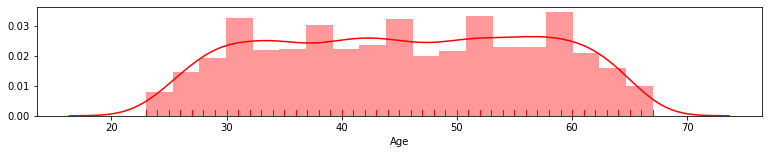

In [60]:
# e1) Univariate Analysis: please refer to question 1 answers for description information, datatypes, null value checks

#Age Distribution
sns.distplot(bank['Age'],kde=True,rug=True,color='red');
#Age is not very skewed

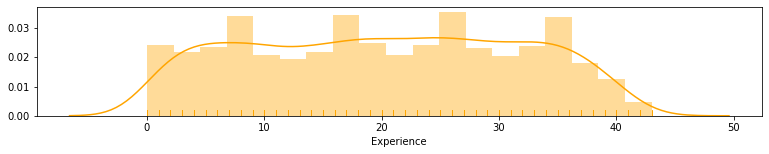

In [64]:
#Experience Distribution
#There are negative numbers for Experience--fix this by making it positive
bank['Experience'] = bank['Experience'].abs()

sns.distplot(bank['Experience'],kde=True,rug=True,color='orange');
#Experience is not very skewed

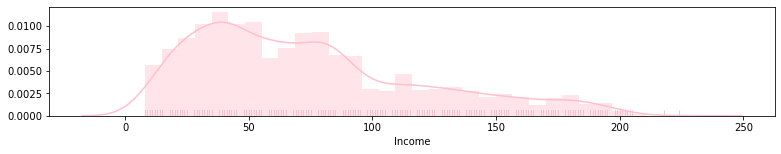

In [67]:
#Income Distribution

sns.distplot(bank['Income'],kde=True,rug=True,color='pink');
#Income is positively or right-skewed. Most people make $100,000 or less.

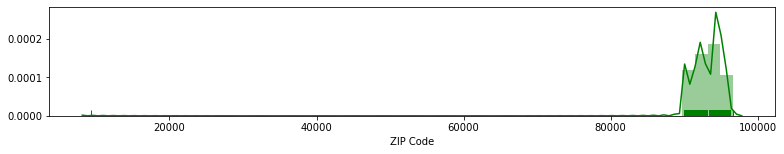

In [68]:
#ZIP Code Distribution

sns.distplot(bank['ZIP Code'],kde=True,rug=True,color='green');
#ZIP code is negatively or left-skewed just by looking at the graph below. But if you think about, it just means
# most of the customers live in the same area.

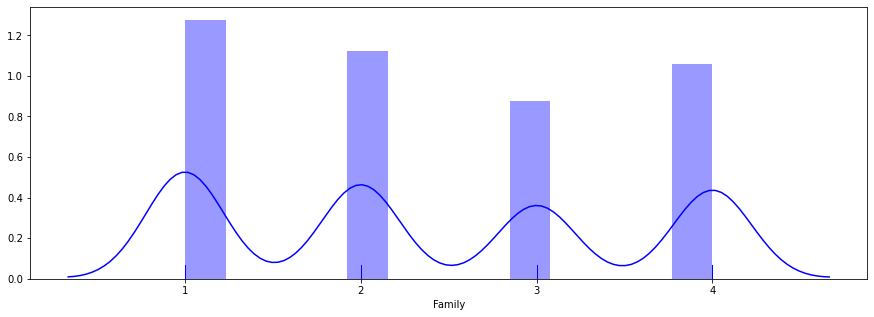

In [75]:
#Family Size Distribution

sns.distplot(bank['Family'],kde=True,rug=True,color='blue');
#Skewness might be the wrong term to observe the resulting graph. I would just say most people in the group are single.


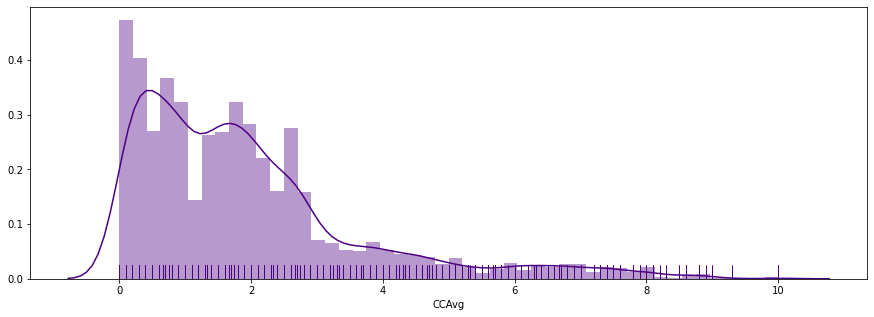

In [76]:
#CCAvg Distribution

sns.distplot(bank['CCAvg'],kde=True,rug=True,color='indigo');
#CCAvg is positively or right-skewed. Looks like most people pay $3,000 or less per month in credit card bills.


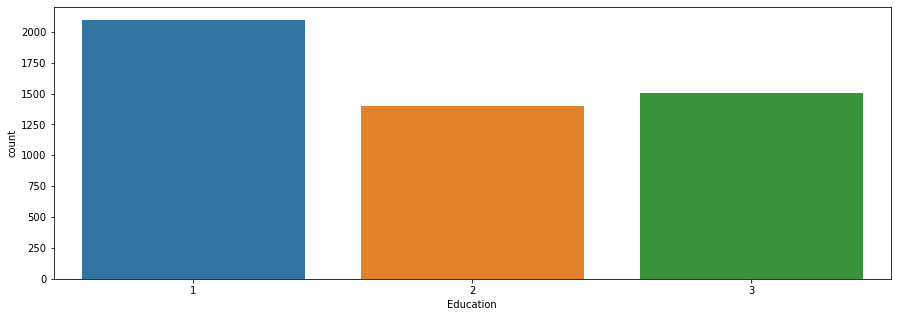

In [89]:
#Education Distribution

sns.countplot(x='Education', data=bank);
#Please also refer to the above categorical value counts for the same conclusion:
# 2096 people have Undergraduates degrees (almost 42%)
# 1403 people have Graduates degrees (about 28%)
# 1501 people have Advance/Professional degrees (about 30%)

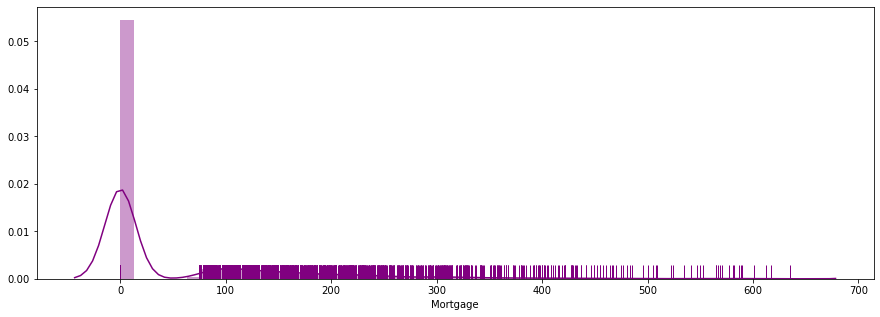

In [77]:
#Mortgage Distribution

sns.distplot(bank['Mortgage'],kde=True,rug=True,color='purple');
#Mortgage is positively or right-skewed. Majority of customers have no mortgage payment.

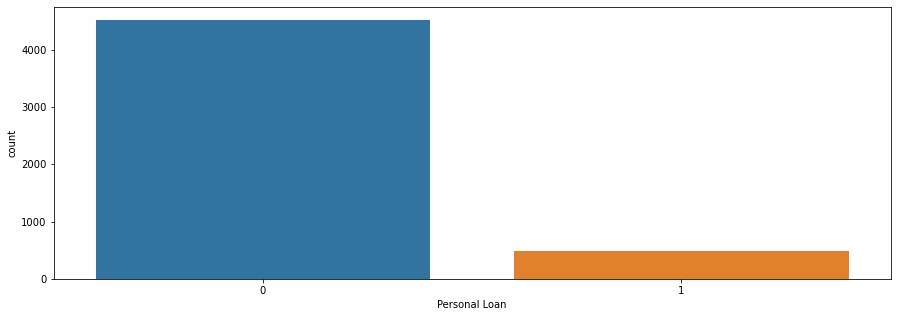

In [82]:
#Personal Loan Distribution

sns.countplot(x='Personal Loan', data=bank);
# Most people do not have personal loans

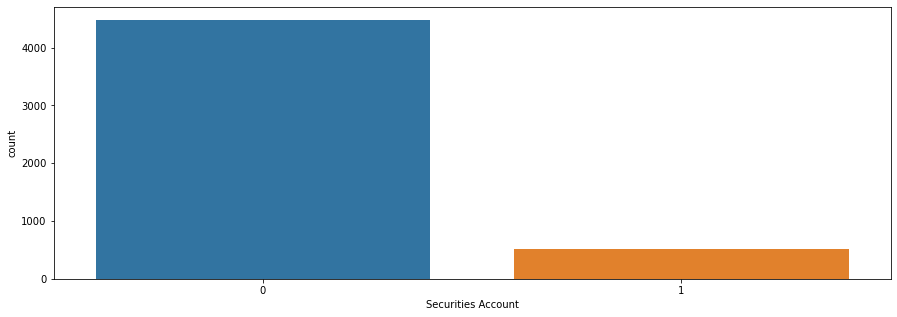

In [83]:
#Securities Account Distribution

sns.countplot(x='Securities Account', data=bank);
#Most customers do not have Securities accounts

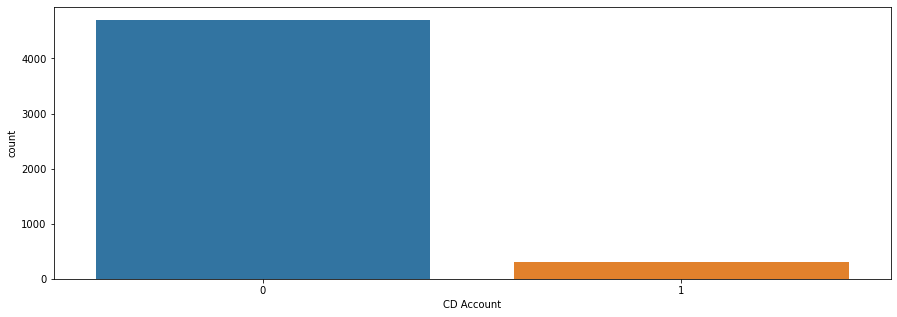

In [84]:
#CD Account Distribution

sns.countplot(x='CD Account', data=bank);
#Most people do not have CD accounts

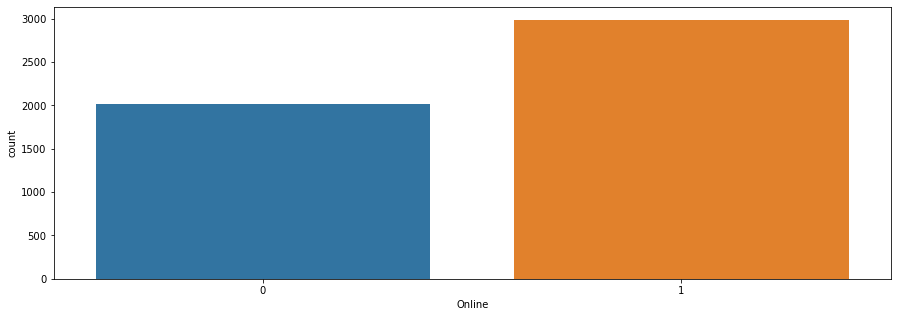

In [85]:
#Online Distribution

sns.countplot(x='Online', data=bank);
#More than half (~3000) of the customers in the dataset use online banking

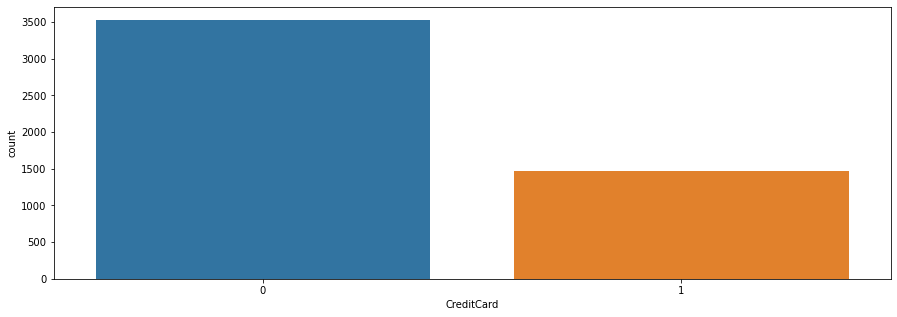

In [88]:
#Credit Card Distribution

sns.countplot(x='CreditCard', data=bank);
#Almost 3500 people do not use credit cards issued by the bank

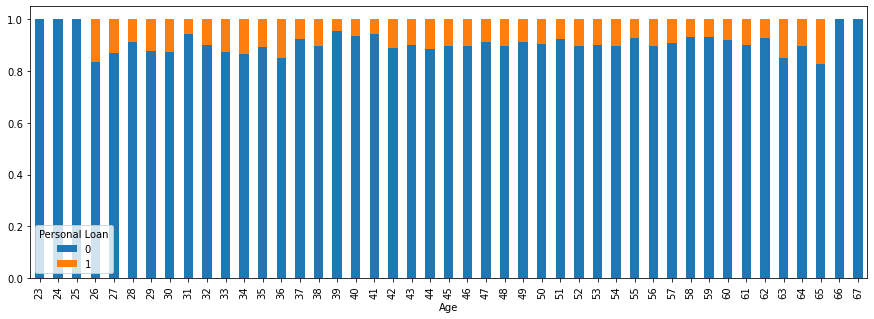

In [91]:
# e2) Bivariate Analysis

#Not including ID and Zip Code in the Bivariate analysis as they don't seem to be useful.

#Age vs. Personal Loan
age=pd.crosstab(bank['Age'],bank['Personal Loan'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#Seems age is not a huge factor in getting a personal loan

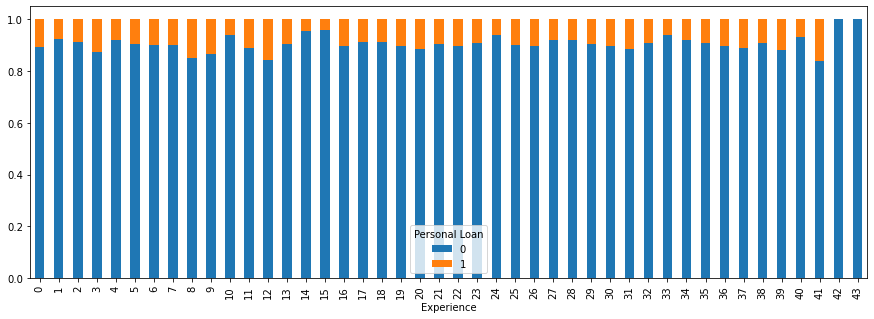

In [92]:
#Experience vs. Personal Loan
exp=pd.crosstab(bank['Experience'],bank['Personal Loan'])
exp.div(exp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#Does not seem like years of experience affects people getting personal loans

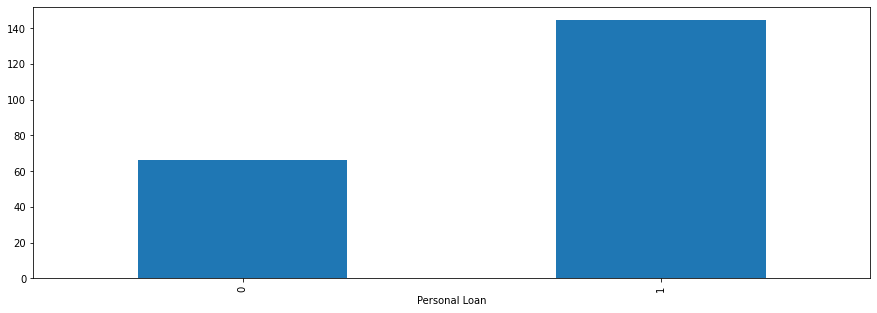

In [102]:
#Income vs. Personal Loan
inc=bank.groupby('Personal Loan')['Income'].mean().plot(kind='bar');

#People with higher average salaries have more personal loans than lower-to-mid income families

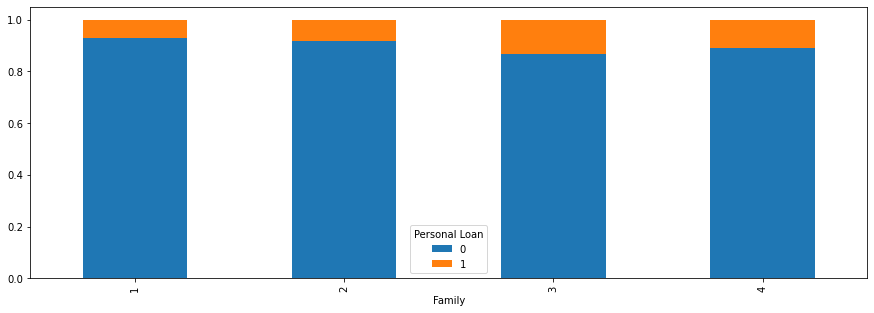

In [103]:
#Family vs. Personal Loan

fam=pd.crosstab(bank['Family'],bank['Personal Loan'])
fam.div(fam.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#Family size does not seem to make a large impact in terms of signing up for personal loans. 
#People with 3-4 family members tend to have a slightly higher probability to purchase personal loans vs. family 1-2 people.

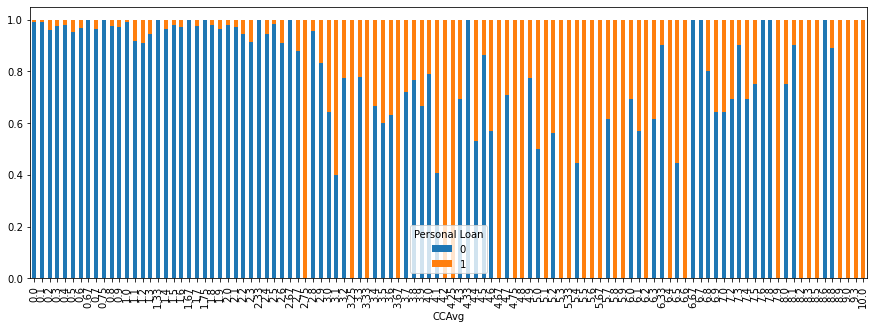

In [104]:
#CCAvg vs. Personal Loan

cca=pd.crosstab(bank['CCAvg'],bank['Personal Loan'])
cca.div(cca.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#People who pay more than $2700/month in credit card bills seem to have more personal loans than 
# those who pay less than $2700/month.

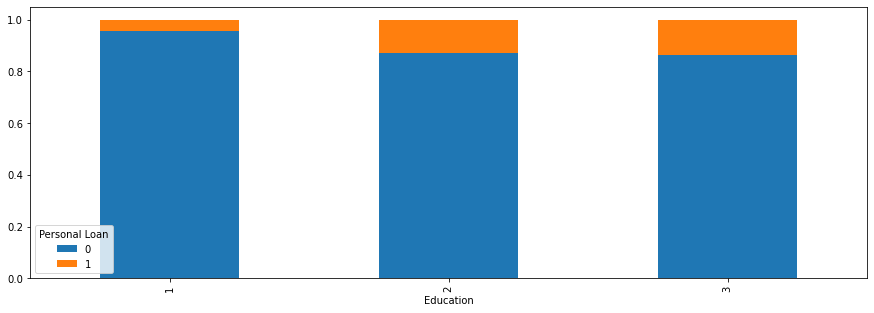

In [105]:
#Education vs. Personal Loan

educ=pd.crosstab(bank['Education'],bank['Personal Loan'])
educ.div(educ.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#People with Graduates and Advanced/Professional degress sign up for personal loans more than people with only
# Undergraduate degrees.

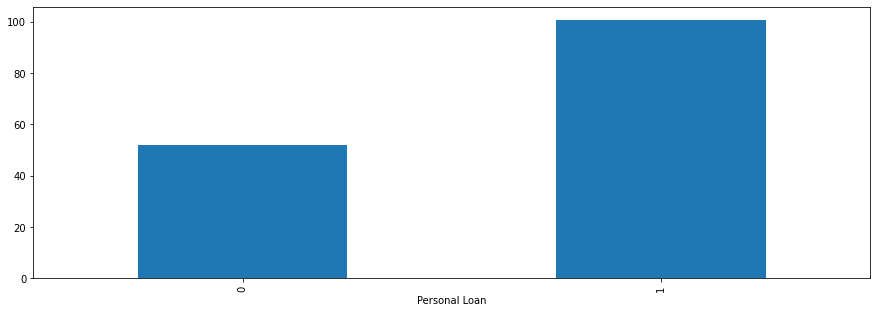

In [107]:
# Mortgage vs. Personal Loan

mort=bank.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar');
#People with higher average mortgages have more personal loans

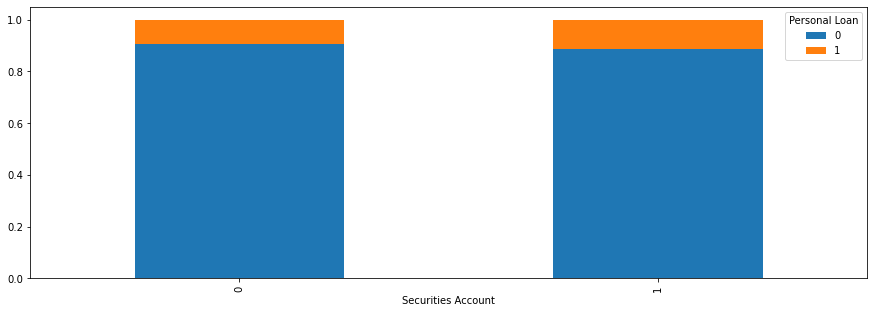

In [108]:
#Securities Account vs. Personal Loan

seca=pd.crosstab(bank['Securities Account'],bank['Personal Loan'])
seca.div(seca.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#People with or without Securities accounts have the same chance of acquiring a personal loan according to the chart.

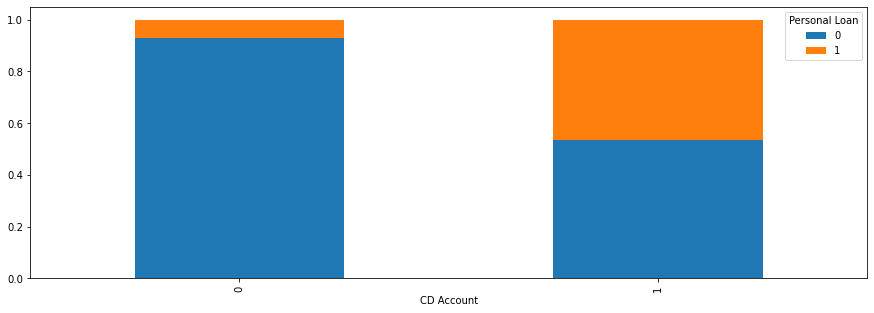

In [109]:
#CD Account vs. Personal Loan

cda=pd.crosstab(bank['CD Account'],bank['Personal Loan'])
cda.div(cda.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#People with Thera Bank CD accounts have more personals loans than those without CD Accounts.

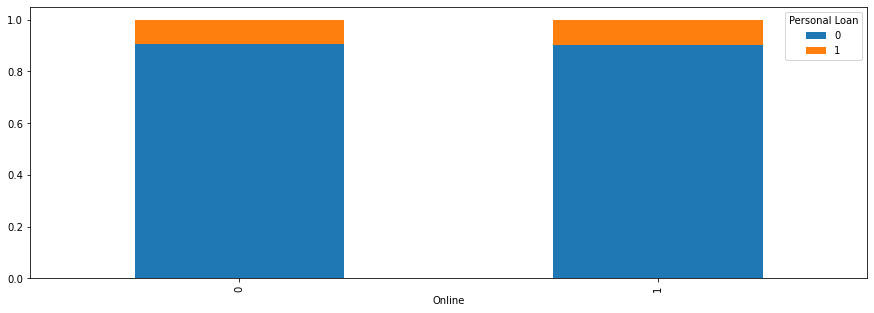

In [110]:
#Online vs. Personal Loan

online=pd.crosstab(bank['Online'],bank['Personal Loan'])
online.div(online.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#Having online accounts does not seem to have a probablity relationship with personal loans.

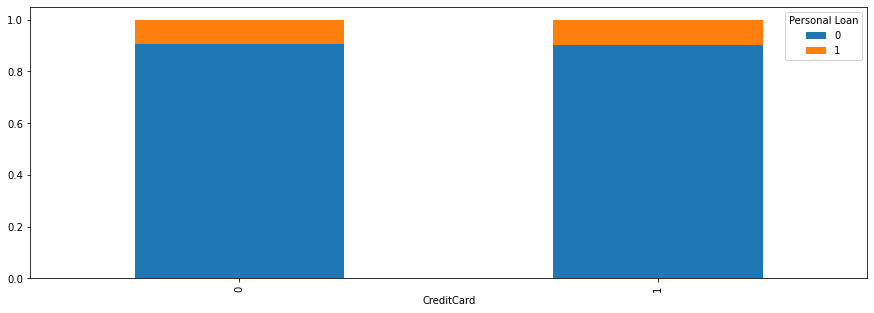

In [111]:
#Credit Card vs. Personal Loan

cc=pd.crosstab(bank['CreditCard'],bank['Personal Loan'])
cc.div(cc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True);

#Having a bank credit card account does not seem to have a probablity relationship with personal loans.

C:\Users\minthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\minthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\minthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


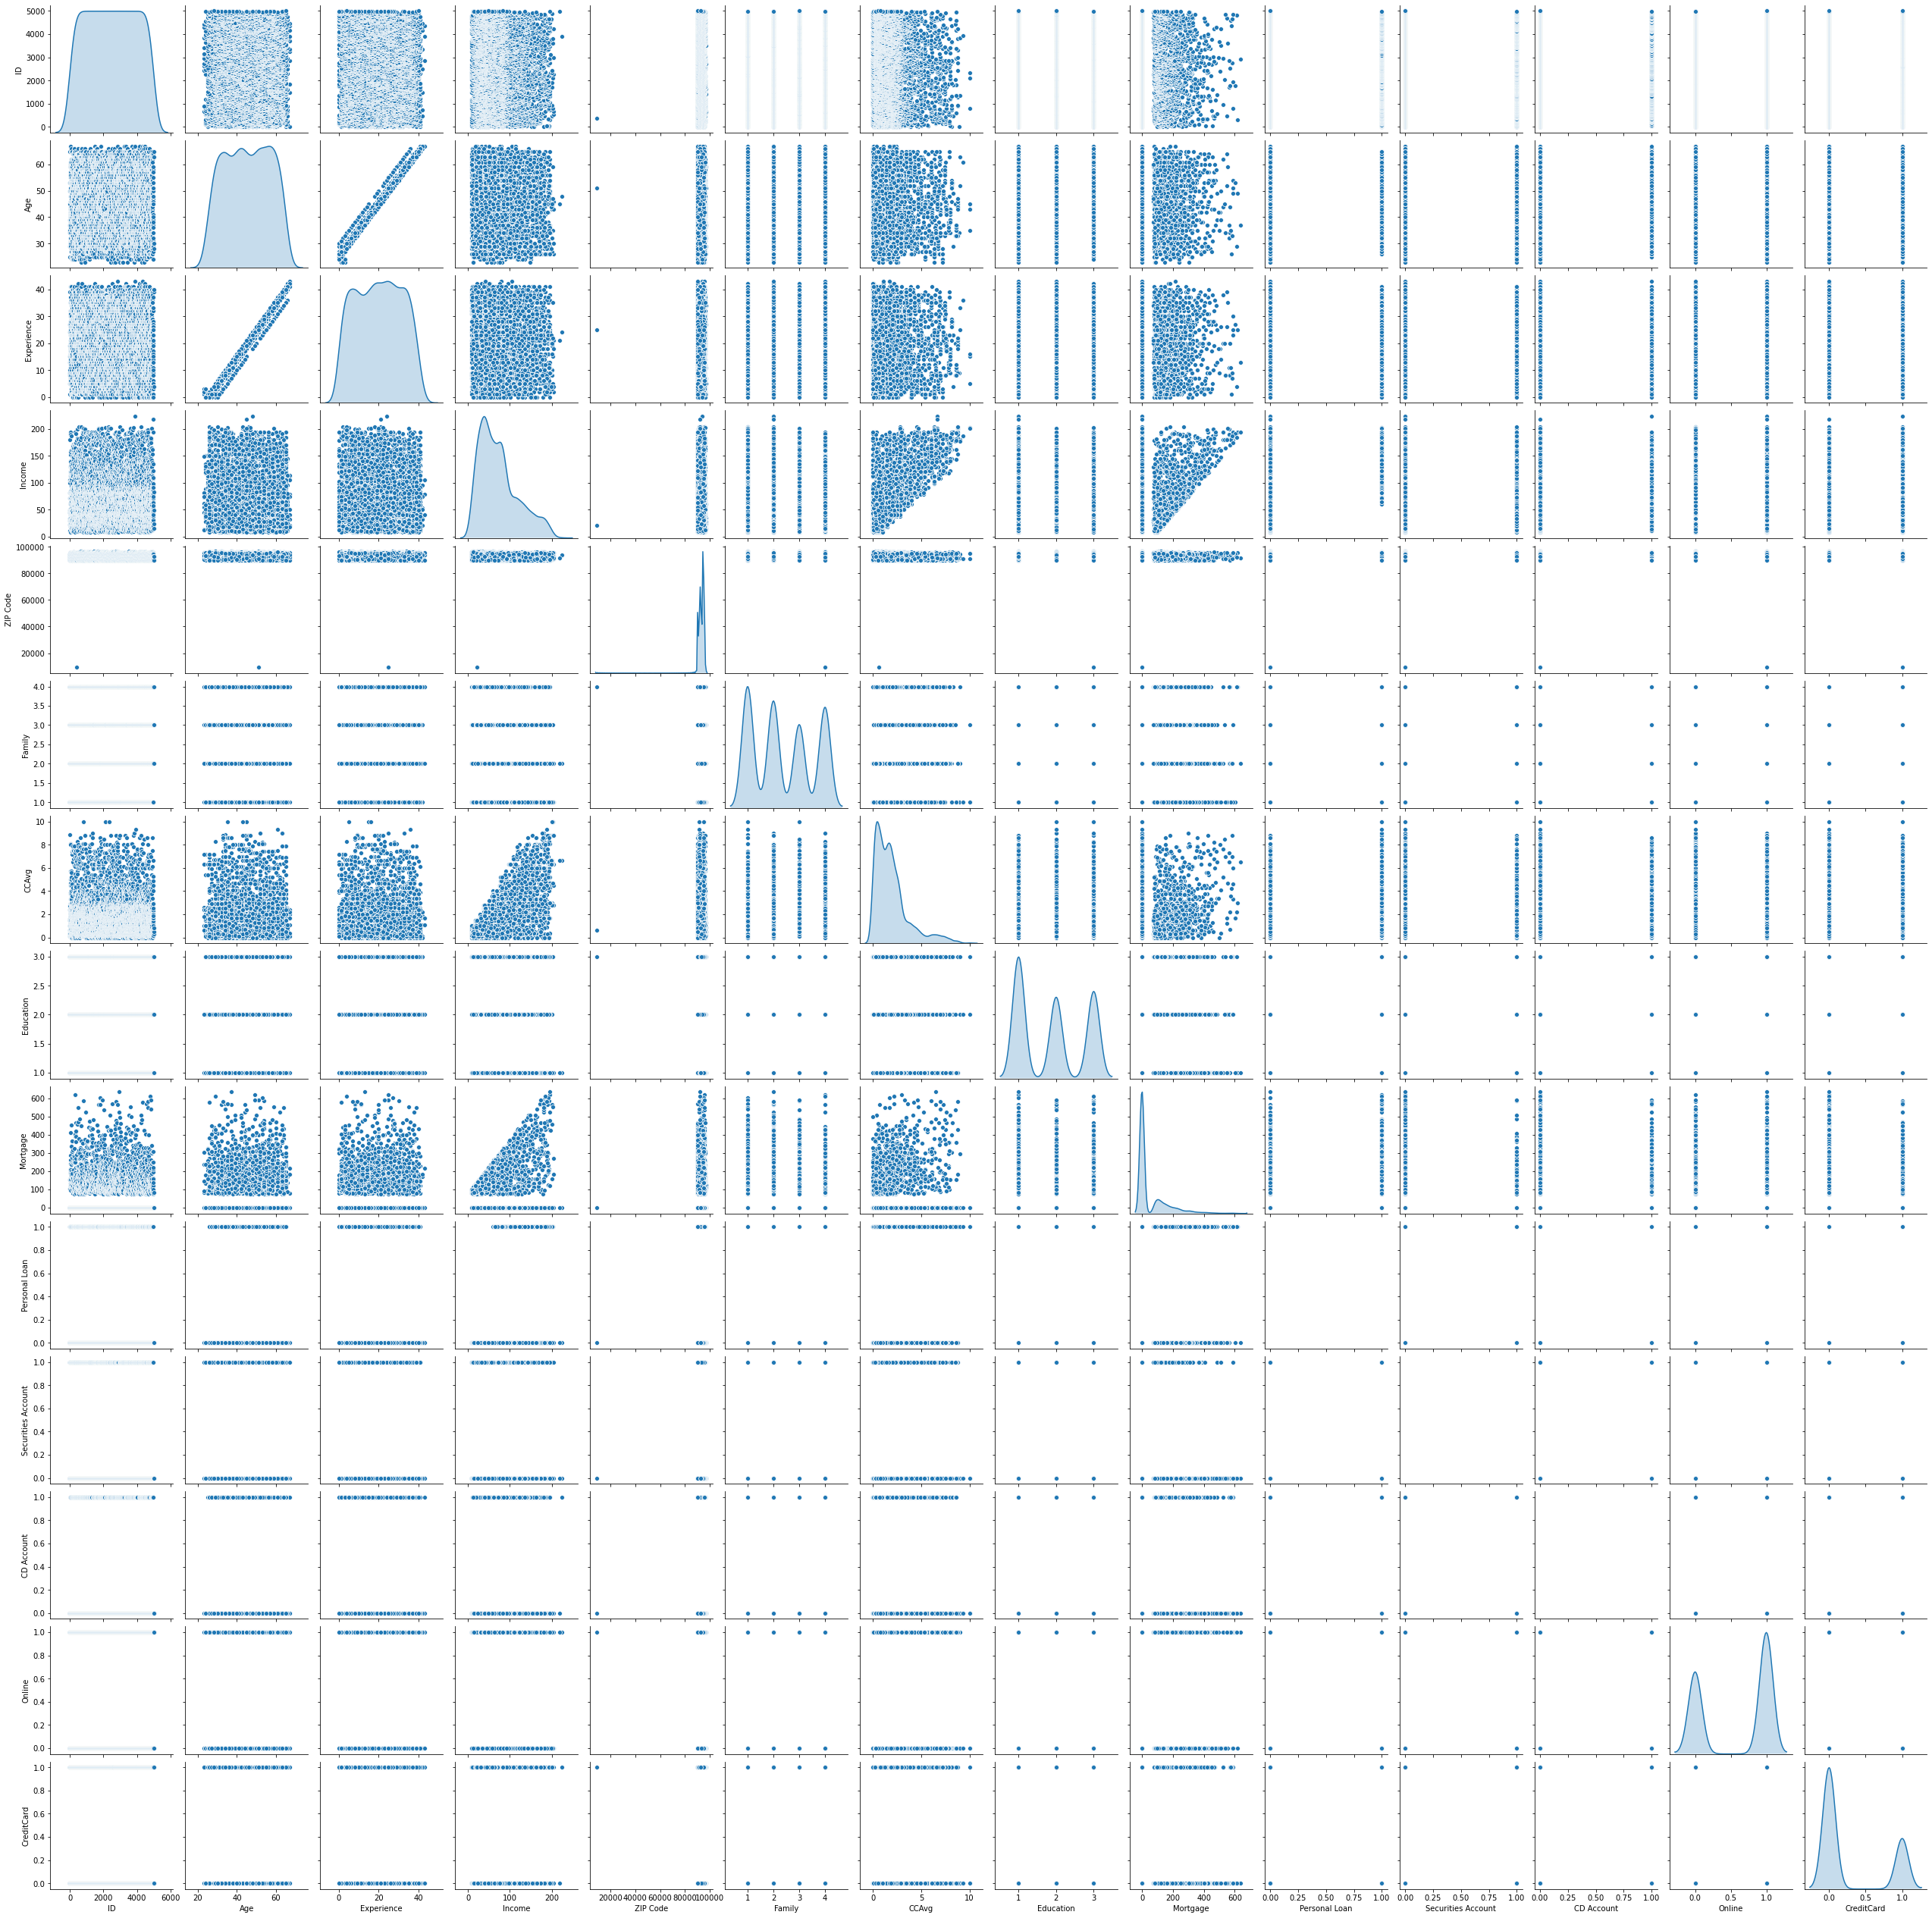

In [114]:
#f) Get data model ready: look at all attributes together, remove unnecessary attributes, do one-hot/label encoding if needed 
#Pairplot to look at all data together

sns.pairplot(bank, diag_kind='kde');

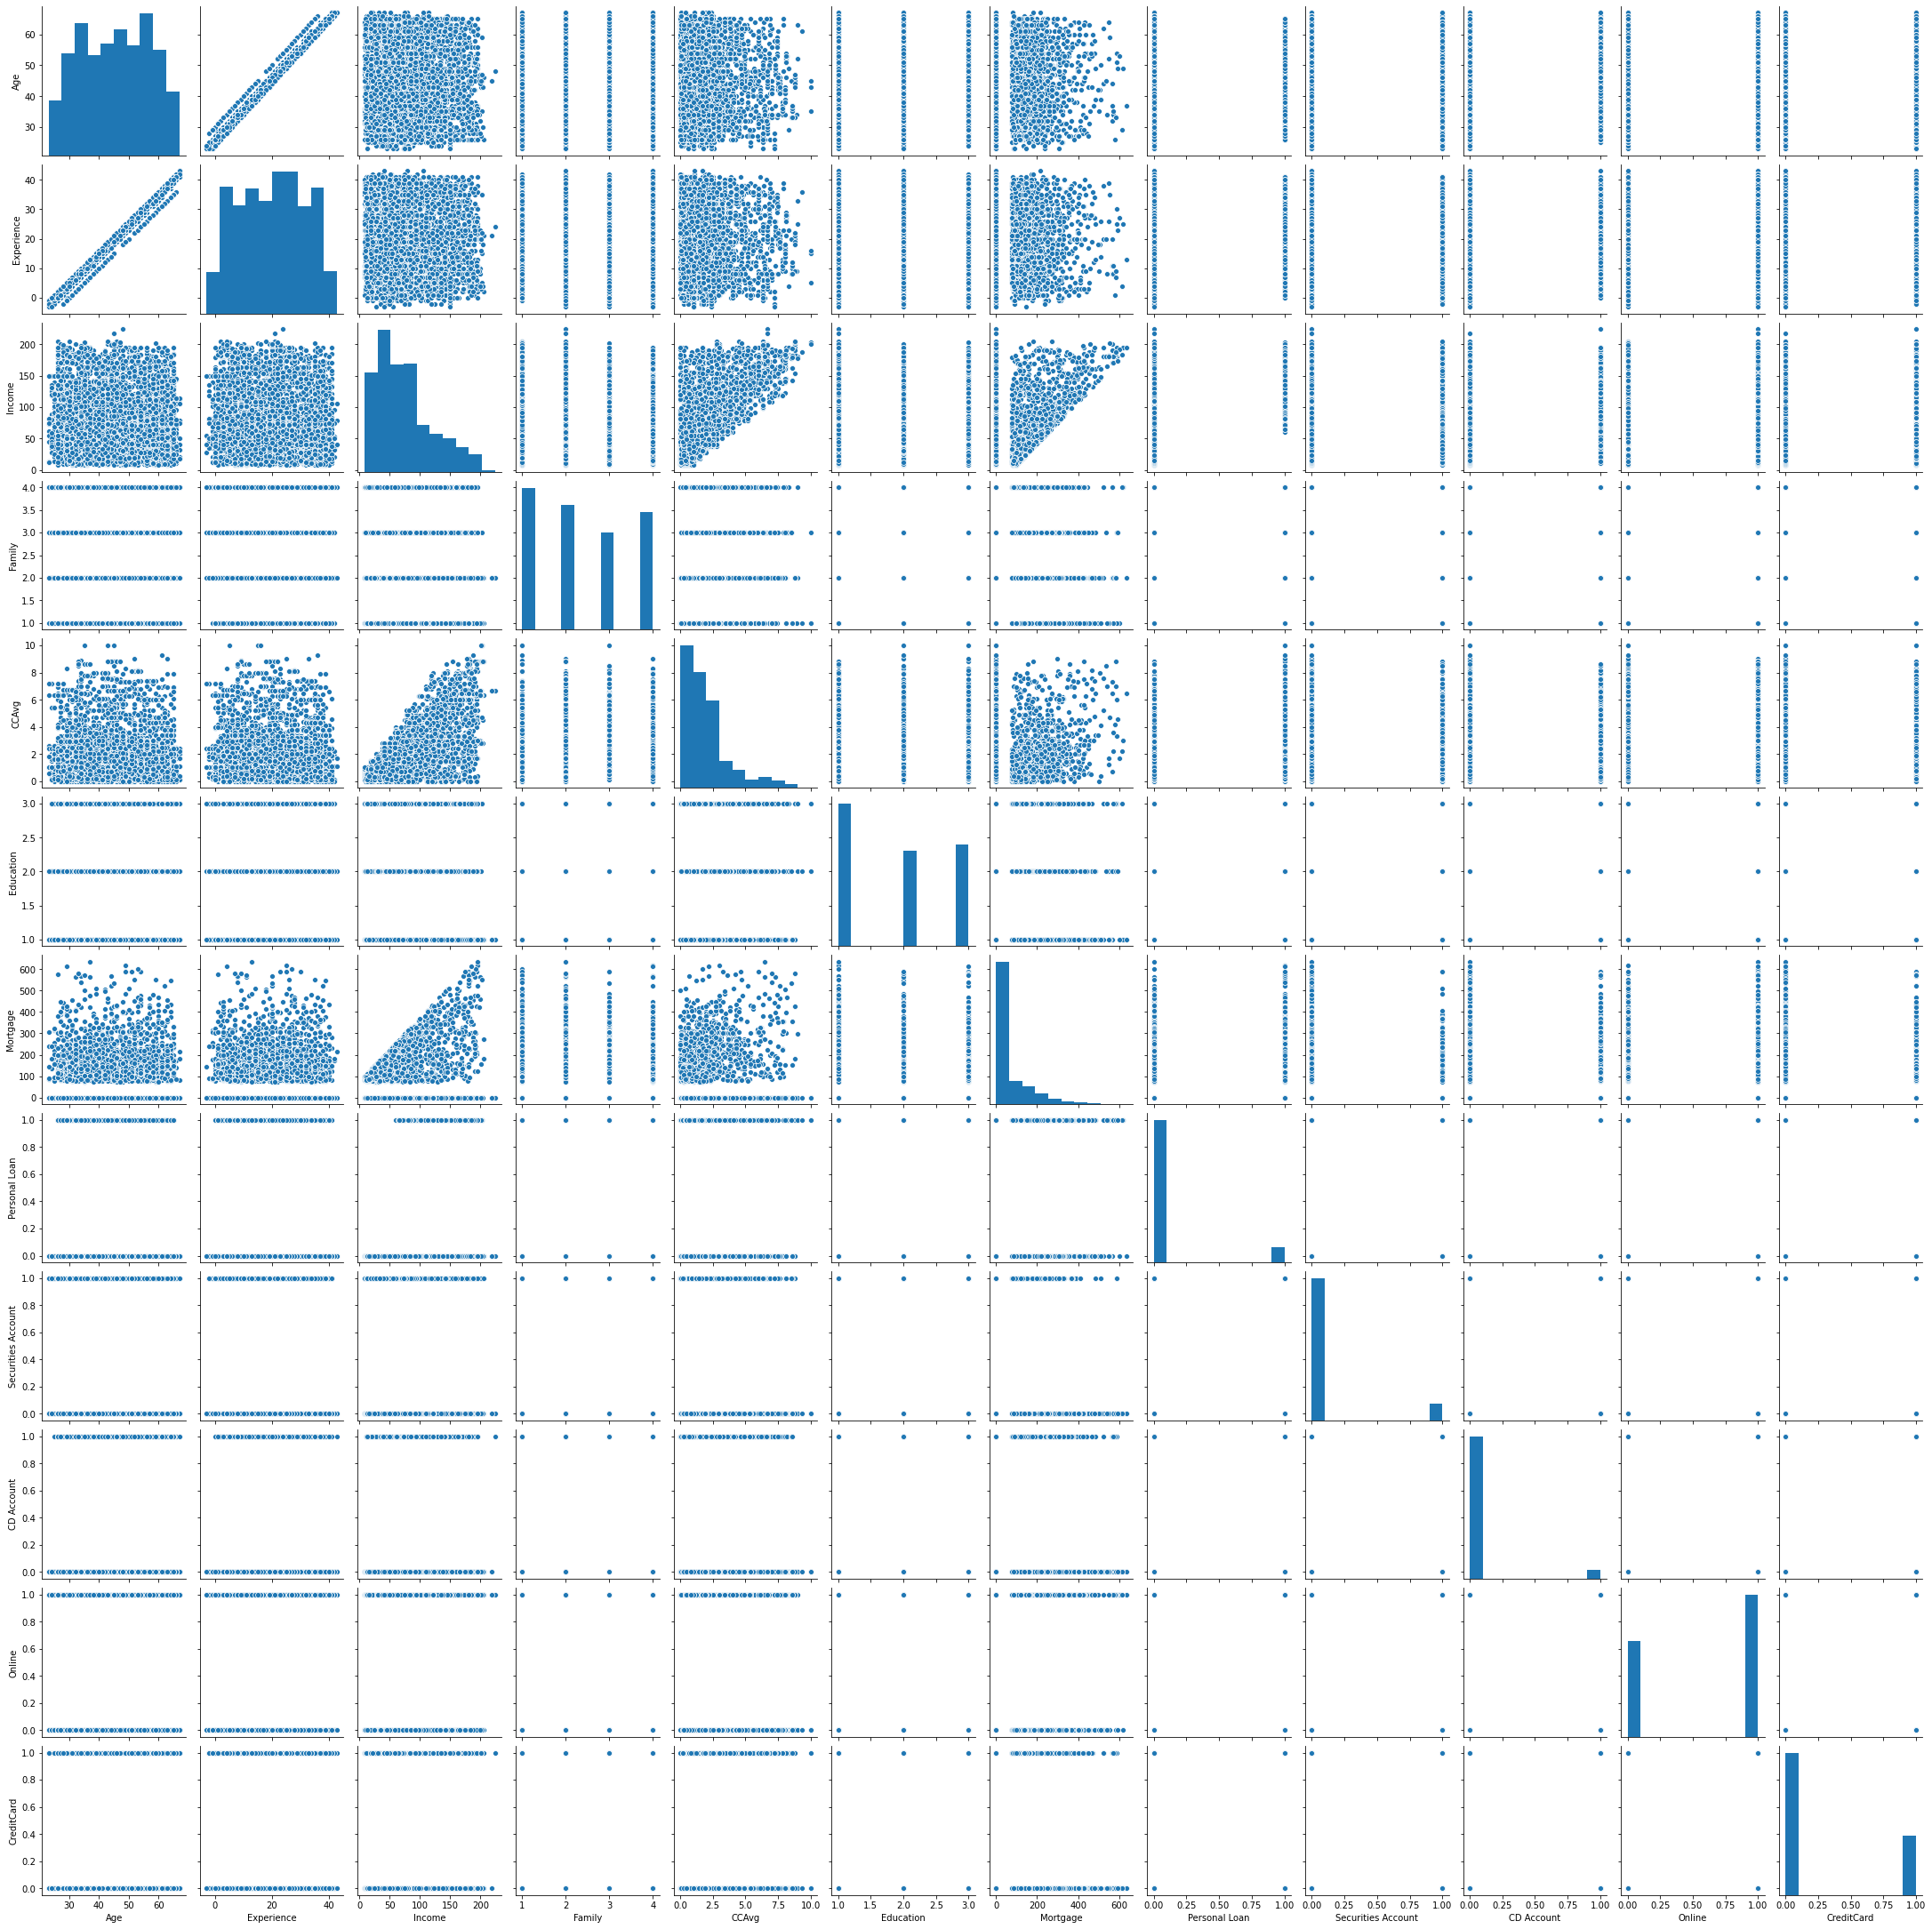

In [232]:
#Exclude variables which do not seem to add relationship value: ID, Zip Code
sns.pairplot(bank[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Personal Loan',
                   'Securities Account','CD Account', 'Online','CreditCard']]);


#Attributes that move together positively:
# Age and Experience
# Income and CCAvg
# Income and Mortgage
# from a prior analysis above, we also note that if a person has a CD account with the bank, the probability
#   of them having a personal loan was higher

In [234]:
#Correlation
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [235]:
#Covariance
bank.cov()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,2.083750e+06,-140.198640,-137.826465,-1175.826465,4.113995e+04,-27.827566,-62.250047,26.021304,-2043.804561,-10.547710,-7.492298,-2.376275,-1.790558,11.199840
Age,-1.401986e+02,131.404166,130.698543,-29.164822,-7.106319e+02,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,-1.378265e+02,130.698543,131.513962,-24.587099,-6.965541e+02,-0.691802,-1.003637,0.126673,-12.342843,-0.025047,-0.004321,0.028288,0.078190,0.046857
Income,-1.175826e+03,-29.164822,-24.587099,2119.104235,-1.602857e+03,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
ZIP Code,4.113995e+04,-710.631942,-696.554125,-1602.857394,4.502257e+06,28.681947,-15.058132,-30.966736,1593.492802,0.067125,3.052497,10.096438,17.685947,7.436005
Family,-2.782757e+01,-0.610664,-0.691802,-8.320957,2.868195e+01,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-6.225005e+01,-1.041997,-1.003637,51.970200,-1.505813e+01,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,2.602130e+01,0.397949,0.126673,-7.250120,-3.096674e+01,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-2.043805e+03,-14.619518,-12.342843,968.321693,1.593493e+03,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-1.054771e+01,-0.026092,-0.025047,6.814640,6.712543e-02,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376


### Looking at Covariance and Correlation gives a better idea of the direction (positive or negative) and how closely the multiple attributes could be "related"

### Did not find it necessary to do label/one-hot encoding as the categorical attributes are already numerical or binary designated.

### 3) Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [118]:
#Independent variables - exclude attributes that will not be useful as well as the target variable
X = bank.drop(['ID','ZIP Code','Personal Loan'], axis=1)
#Target variable
y = bank[['Personal Loan']]

#70:30 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### 4) Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [150]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [185]:
# Predicting the target variable on test data
y_predict = lr.predict(X_test)

# Predicted vs. observed
z = X_test.copy()
z['Observed'] = y_test
z['Predicted'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed,Predicted
2764,31,5,84,1,2.9,3,105,0,0,0,1,0,0
4767,35,9,45,3,0.9,1,101,1,0,0,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,1,0,0,0
2735,36,12,70,3,2.6,2,165,0,0,1,0,0,0


In [164]:
#Confusion Matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig Accuracy 0.95
Testing Accuracy 0.9426666666666667
Recall: 0.5369127516778524
Precision: 0.8247422680412371
F1 Score: 0.6504065040650406
ROC_AUC_Score: 0.7621647400136118

Confusion Matrix


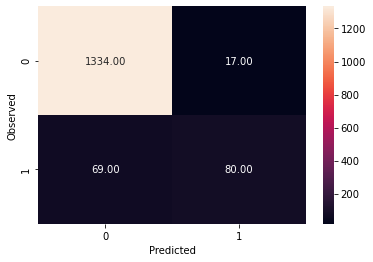

None


In [175]:
print("Trainig Accuracy",lr.score(X_train,y_train))  
print("Testing Accuracy",lr.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("ROC_AUC_Score:",roc_auc_score(y_test,y_predict))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

In [ ]:
#According to the Training/Testing accuracy, we can confidently look at the confusion matrix and "predict" that 
#  most people will not get personal loans.

### 5) Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [183]:
#Attributes Coefficients in dataframe form

ce = pd.DataFrame()
ce['Column'] = X_train.columns
ce['Coefficients'] = np.round(abs(lr.coef_[0]),2)
ce.sort_values(by='Coefficients',ascending=False)

,Column,Coefficients
8,CD Account,1.96
5,Education,1.38
3,Family,0.65
0,Age,0.46
1,Experience,0.46
10,CreditCard,0.41
9,Online,0.33
4,CCAvg,0.15
7,Securities Account,0.06
2,Income,0.05


In [212]:
#Test Data--show rows where predicted != observed class

# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

#Predicted == 0 and Observed == 1
# count results == 69
p1=z.loc[(z['Predicted'] == 0) & (z['Observed'] == 1)]

#Predicted == 1 and Observed == 0
#count results == 17
p2=z.loc[(z['Predicted'] == 1) & (z['Observed'] == 0)]

frames = [p1, p2]

not_equal = pd.concat(frames)
not_equal
#count results == 86 where Predicted and Observed results were opposite

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed,Predicted
4377,33,8,145,1,2.7,3,0,0,0,1,0,1,0
3988,59,35,85,1,3.4,3,0,0,1,0,1,1,0
3271,52,27,93,4,4.1,2,0,0,0,0,1,1,0
349,26,2,60,2,3.0,1,132,0,0,0,0,1,0
927,65,40,95,3,3.7,2,138,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,43,17,84,4,2.6,3,289,1,1,1,1,0,1
3312,47,22,190,2,8.8,1,0,0,0,0,0,0,1
4256,41,17,165,2,7.6,1,157,0,0,0,0,0,1
4156,37,12,193,1,8.6,1,0,0,0,0,0,0,1


### 6) Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion Matrix`

*True Positive (observed=1,predicted=1):*

Predicted customer would get a personal loan and the customer did buy a personal loan

*False Positive (observed=0,predicted=1):*

Predicted customer would get a personal loan but the customer did not buy a personal loan

*True Negative (observed=0,predicted=0):*

Predicted customer would not get a personal loan and the customer did not buy a personal loan

*False Negative (observed=1,predicted=0):*

Predicted customer would not get a personal loan but the customer did buy a personal loan

##### `Important Attributes`

Top 3 Attributes According to Coefficients:
- CD Account
- Education
- Family


##### `Important Metric`

It looks like most people, in general, do not prefer to buy personal loans.

"Education" and "Family" are not within the bank's influence nor can they discriminate against people using these factors. The bank should focus on easy entry into CD accounts so that customers have a higher probability of buying personal loans (according to the data).

False Negative responses (69) are high compared to True Positives (80). The bank might need more variables otherwise they'll be missing out on customers wanting to buying loans. Overall, we can say/predict that the likelihood of liability customers buying loans is low unless they open CD accounts first.